In [1]:
import os
os.environ['HOME']='C:'#os.environ['HOMEDRIVE']
os.environ['XUVTOP'] = 'C:\\CHIANTI_10.1_database'
import ChiantiPy
import ChiantiPy.core as ch
import ChiantiPy.tools.filters as chfilters
import ChiantiPy.tools.io as chio
import numpy as np
import matplotlib.pyplot as plt
'''https://github.com/chianti-atomic/ChiantiPy'''

 ChiantiPy version 0.15.1 
 found PyQt5 widgets
 using PyQt5 widgets


In [2]:
chianti_version = chio.versionRead()
chianti_version

'10.1'

using index =    10 specifying temperature =    2.00e+06


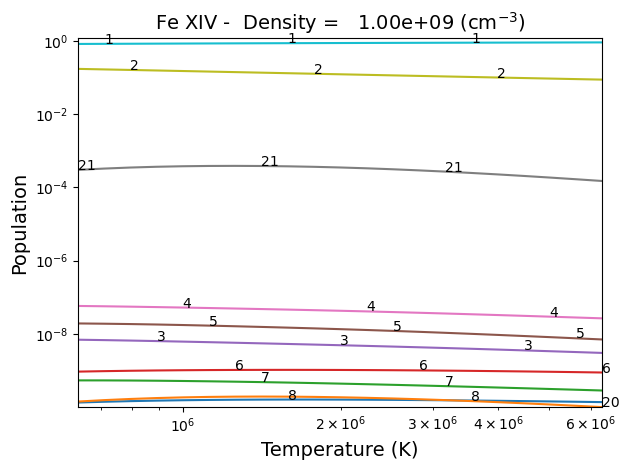

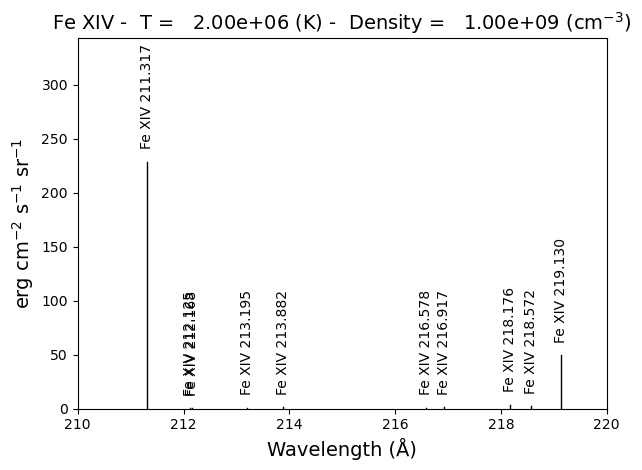

In [4]:
temp = 10.**(5.8 + 0.05*np.arange(21.))
fe14 = ch.ion('fe_14', temperature=temp, eDensity=1.e+9, em=1.e+27)
fe14.popPlot(addLegend=False)
fe14.intensityPlot(wvlRange=[210.,220.])